In [1]:
import pandas as pd

In [2]:
# Optional display settings for better notebook formatting
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 10)       # Limit number of rows shown
pd.set_option('display.width', 1000)        # Width of the display in characters

In [3]:
Train = pd.read_csv('Train-1542865627584.csv')  # 5,410 rows, Provider fraud labels
Beneficiary = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')  # 138,556 rows, Patient info
Inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')  # 40,474 rows, Hospital stays
Outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')  # 517,737 rows, Outpatient visits

In [4]:
Inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [5]:
Outpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [6]:
Beneficiary.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50


In [7]:
# Inpatient data
# List of diagnosis columns
diagnosis_cols = [f'ClmDiagnosisCode_{i}' for i in range(1, 11)]

# Creating the NumDiagnoses column
Inpatient['NumDiagnoses'] = Inpatient[diagnosis_cols].notna().sum(axis=1)
Inpatient.rename(columns={'NumDiagnoses': 'IP_total_diagnosis'}, inplace=True)

In [8]:
# Get provider-level IP  diagnosis 
IP_provider_Diagnosis = Inpatient.groupby('Provider')['IP_total_diagnosis'].sum().reset_index()

In [9]:
IP_provider_Diagnosis

,Provider,IP_total_diagnosis
0,PRV51001,36
1,PRV51003,503
2,PRV51007,22
3,PRV51008,15
4,PRV51011,8
...,...,...
2087,PRV57719,33
2088,PRV57728,6
2089,PRV57729,92
2090,PRV57732,81


In [10]:
# Outpatient data
# List of diagnosis columns
diagnosis_cols = [f'ClmDiagnosisCode_{i}' for i in range(1, 11)]

# Creating the NumDiagnoses column
Outpatient['NumDiagnoses'] = Outpatient[diagnosis_cols].notna().sum(axis=1)
Outpatient.rename(columns={'NumDiagnoses': 'OP_total_diagnosis'}, inplace=True)

In [11]:
# Get provider-level OP  diagnosis 
OP_provider_Diagnosis = Outpatient.groupby('Provider')['OP_total_diagnosis'].sum().reset_index()

In [12]:
OP_provider_Diagnosis

,Provider,OP_total_diagnosis
0,PRV51001,44
1,PRV51003,190
2,PRV51004,385
3,PRV51005,3016
4,PRV51007,193
...,...,...
5007,PRV57759,58
5008,PRV57760,52
5009,PRV57761,219
5010,PRV57762,1


In [13]:
# Merge IP and OP provider totals
Provider_all_diagnosis = pd.merge(
    IP_provider_Diagnosis,  
    OP_provider_Diagnosis,  
    on='Provider',
    how='outer'
).fillna(0)  

In [14]:
Provider_all_diagnosis

,Provider,IP_total_diagnosis,OP_total_diagnosis
0,PRV51001,36.0,44.0
1,PRV51003,503.0,190.0
2,PRV51004,0.0,385.0
3,PRV51005,0.0,3016.0
4,PRV51007,22.0,193.0
...,...,...,...
5405,PRV57759,0.0,58.0
5406,PRV57760,0.0,52.0
5407,PRV57761,0.0,219.0
5408,PRV57762,0.0,1.0


In [15]:
# Then merge with fraud labels
df_diagnosis = pd.merge(
    Provider_all_diagnosis,
    Train[['Provider', 'PotentialFraud']],
    on='Provider',
    how='outer'
)

In [16]:
df_diagnosis

,Provider,IP_total_diagnosis,OP_total_diagnosis,PotentialFraud
0,PRV51001,36.0,44.0,No
1,PRV51003,503.0,190.0,Yes
2,PRV51004,0.0,385.0,No
3,PRV51005,0.0,3016.0,Yes
4,PRV51007,22.0,193.0,No
...,...,...,...,...
5405,PRV57759,0.0,58.0,No
5406,PRV57760,0.0,52.0,No
5407,PRV57761,0.0,219.0,No
5408,PRV57762,0.0,1.0,No


In [17]:
# Save df_diagnosis as a CSV file
df_diagnosis.to_csv("Merge_providerlevel_numdiagnosis.csv", index=False)

<Figure size 1000x500 with 0 Axes>

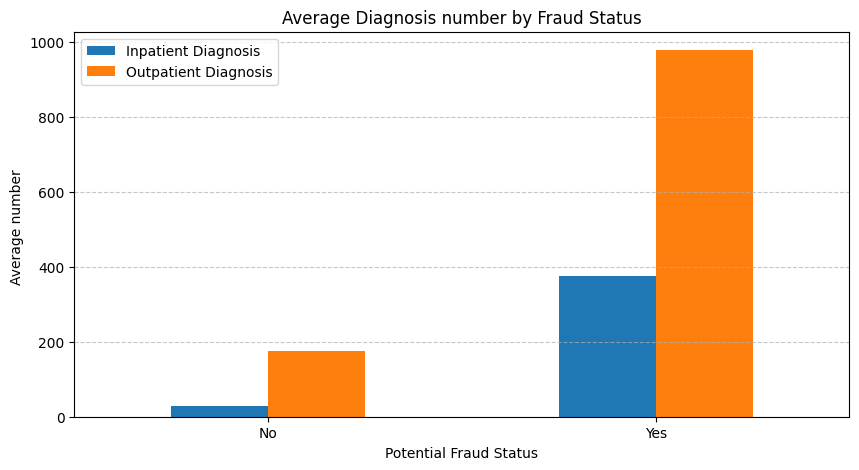

In [18]:
import matplotlib.pyplot as plt

# Grouping by PotentialFraud and calculating mean Diagnosis number
fraud_summary = df_diagnosis.groupby("PotentialFraud")[
    ["IP_total_diagnosis", "OP_total_diagnosis"]
].mean()

# Plotting Inpatient and Outpatient Diagnosis Comparisons
plt.figure(figsize=(10, 5))
fraud_summary.plot(kind="bar", figsize=(10, 5), rot=0)
plt.title("Average Diagnosis number by Fraud Status")
plt.ylabel("Average number ")
plt.xlabel("Potential Fraud Status")
plt.xticks(rotation=0)
plt.legend(["Inpatient Diagnosis", "Outpatient Diagnosis"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


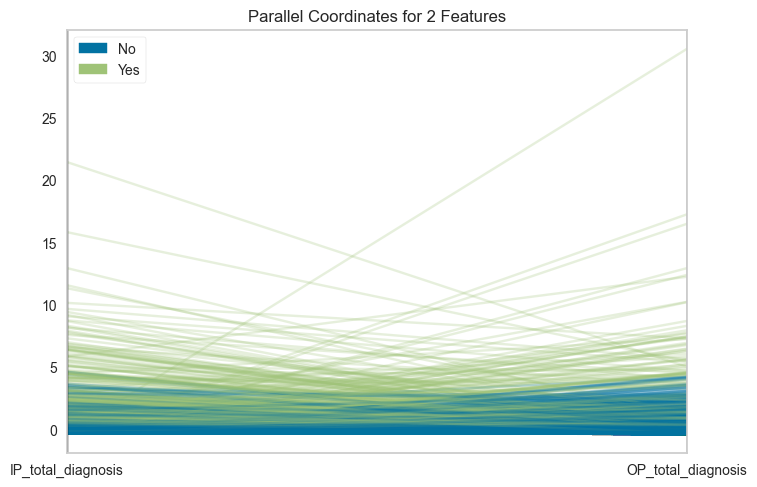

In [19]:
# Parallel Coordinates: Visualize how individual feature values vary across classes.

from yellowbrick.features import ParallelCoordinates
from sklearn.preprocessing import StandardScaler

# Prepare features and target
X = df_diagnosis[['IP_total_diagnosis', 'OP_total_diagnosis']]
y = (df_diagnosis['PotentialFraud'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


visualizer_parallel = ParallelCoordinates()
visualizer_parallel.fit_transform(X_scaled, y)
visualizer_parallel.show();